In [3]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pickle
import sys
import numpy as np
#import emcee
import corner

sys.path.append('../modules/')
import CL_WL_DATAOPS_make_profile as prf
#import CL_WL_fit_cluster_mass_v2 as fit
#import analysis_Mass_Richness_relation as analysis
#import CL_fiducial_mass_richness_relation as fiducial
#import CL_Likelihood_for_Mass_richness_relation as mr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def load(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [5]:
profile_Metacal = load('../data/individual_profile_dc2dr6_gal_redMaPPer_cluster_Metacal.pkl')
profile_HSM = load('../data/individual_profile_dc2dr6_gal_redMaPPer_cluster_HSM.pkl')
profile_true = load('../data/individual_profile_cosmoDC2_gal_redMaPPer_cluster_epsilon_shape_true_z.pkl')
profile_true_no_shapenoise = load('../data/individual_profile_cosmoDC2_gal_redMaPPer_cluster_shear_shape_true_z.pkl')

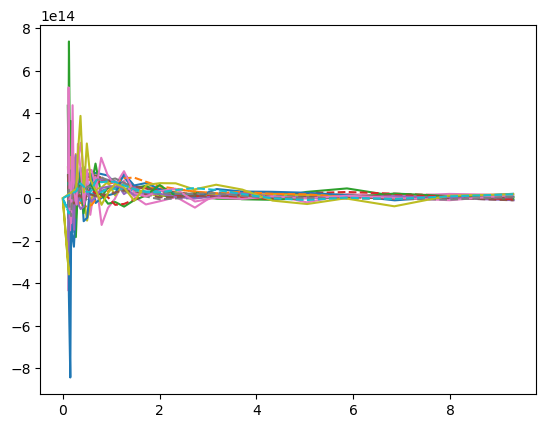

In [6]:
for i in range(10):
    plt.plot(profile_true[i]['radius_av'], profile_true[i]['gt_av'])
    plt.plot(profile_true_no_shapenoise[i]['radius_av'], profile_true_no_shapenoise[i]['gt_av'], '--')

In [7]:
#fiducial_constraint = fiducial.constrain_fiducial(used_cluster_id_list = np.array(profile_true['cluster_id']), low_M_cut = 3e13)

In [8]:
gt_av = profile_Metacal['gt_av']
R_T = profile_Metacal['<R_T>']
a_calib = []
for i, gt in enumerate(gt_av):
    R = R_T[i]
    norm = profile_Metacal['norm_sum'][i]
    a_calib.append(np.array([gt[j]/R[j] if norm[j] != 0 else 0 for j in range(len(gt))]))
profile_Metacal['gt_av_calib'] = np.array(a_calib)
profile_HSM['gt_av_calib'] = profile_HSM['gt_av']/.8

In [37]:
Obs_bin = [[20, 100]]
Z_bin = [[0.2, 0.5]]

# WL masses

In [38]:
profile_Metacal

cluster_id,richness,cluster_z,radial_bin,gt_av,gx_av,radius_av,<R_T>,norm_sum,gt_av_calib
int32,float32[1],float32[1],float64[31],object[30],object[30],object[30],object[30],object[30],float64[30]
202,73.96033,0.43476507,0.1 .. 10.0,0 .. 0,0 .. 0,0 .. 0,0 .. 0,0 .. 0,0.0 .. 0.0
525,53.54917,0.50581187,0.1 .. 10.0,0 .. 16090932139583.451,0 .. 13648255016317.213,0 .. 9.305200744671046,0 .. 0.7563537763341934,0.0 .. 5.792086294640581e-27,0.0 .. 21274346268978.902
733,51.138885,0.6326652,0.1 .. 10.0,0 .. -2424793031210.4863,0 .. -43539666211812.69,0 .. 9.327566705852083,0 .. 0.7624917986057089,0.0 .. 2.7713330654103826e-27,0.0 .. -3180090639196.9834
1474,28.85137,0.45721444,0.1 .. 10.0,0 .. -6396380853191.362,0 .. 4127030224966.732,0 .. 9.30235657114205,0 .. 0.7608331786438843,0.0 .. 1.1514264409492828e-26,0.0 .. -8407074024548.098
1803,30.102278,0.67928797,0.1 .. 10.0,0 .. 16111458483346.918,0 .. -24710985948257.434,0 .. 9.30923036381715,0 .. 0.743060692508014,0.0 .. 2.4728284865512855e-27,0.0 .. 21682560584609.52
2219,29.400549,0.4688231,0.1 .. 10.0,0 .. -8409205087653.558,0 .. -7278445512257.179,0 .. 9.303457755031385,0 .. 0.7510895108124944,0.0 .. 9.353629561267809e-27,0.0 .. -11196009219402.975
2024,26.700418,0.8429875,0.1 .. 10.0,0 .. 48336001891780.61,0 .. -7333825494595.83,0 .. 9.350462434273895,0 .. 0.7164757308580646,0.0 .. 8.499248476804727e-28,0.0 .. 67463557814990.49
2608,29.248,0.36833343,0.1 .. 10.0,0 .. -10811267794100.73,0 .. -19255769982553.652,0 .. 9.326037707462675,0 .. 0.7616989907214271,0.0 .. 1.0992953404402677e-26,0.0 .. -14193622317736.127
439,58.232452,0.78525174,0.1 .. 10.0,0 .. -13285166542212.992,0 .. 19322568206549.695,0 .. 9.449722510559008,0 .. 0.7814734221561777,0.0 .. 4.35370532381177e-28,0.0 .. -17000151464598.305


Metacal

In [39]:
profile_Metacal_stack_calib = prf.stacked_profile(profile = profile_Metacal,
                    r_in = 'radius_av',
                    gt_in = 'gt_av_calib', gx_in = 'gt_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

covariance_Metacal_stack_calib = prf.bootstrap_covariance(profile = profile_Metacal,
                    r_in = 'radius_av',
                    gt_in = 'gt_av_calib', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    n_boot = 100,
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

837


In [40]:
profile_Metacal_stack = prf.stacked_profile(profile = profile_Metacal,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gt_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

covariance_Metacal_stack = prf.bootstrap_covariance(profile = profile_Metacal,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    #n_boot = 400,
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

837


HSM

In [41]:
profile_HSM_stack = prf.stacked_profile(profile = profile_HSM,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gt_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

covariance_HSM_stack = prf.bootstrap_covariance(profile = profile_HSM,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    #n_boot = 400,
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

837


In [42]:
profile_HSM_stack_calib = prf.stacked_profile(profile = profile_HSM,
                    r_in = 'radius_av',
                    gt_in = 'gt_av_calib', gx_in = 'gt_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

covariance_HSM_stack_calib = prf.bootstrap_covariance(profile = profile_HSM,
                    r_in = 'radius_av',
                    gt_in = 'gt_av_calib', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    #n_boot = 400,
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

837


True

In [43]:
profile_true_stack = prf.stacked_profile(profile = profile_true,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gt_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

covariance_true_stack = prf.bootstrap_covariance(profile = profile_true,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                n_boot = 400,
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

1033


['z_mean', 'obs_mean', 'obs_rms', 'radius', 'gt', 'gx', 'gt_individual', 'radius_individual', 'n_stack', 'cluster_id', 'z_individual', 'obs_individual', 'z_bin', 'obs_bin']
['z_mean', 'obs_mean', 'obs_rms', 'radius', 'gt', 'gx', 'gt_individual', 'radius_individual', 'n_stack', 'cluster_id', 'z_individual', 'obs_individual', 'z_bin', 'obs_bin']
['z_mean', 'obs_mean', 'obs_rms', 'radius', 'gt', 'gx', 'gt_individual', 'radius_individual', 'n_stack', 'cluster_id', 'z_individual', 'obs_individual', 'z_bin', 'obs_bin']


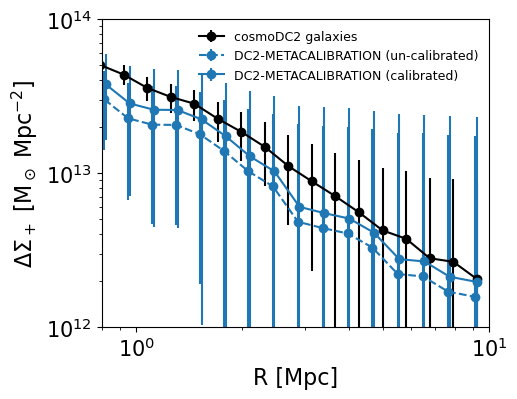

In [44]:
plt.figure(figsize=(5, 4))
color = ['k', 'C0', 'C0', 'C1']
fmt= ['-', '--', '-', '-']
label = ['cosmoDC2 galaxies', 'DC2-METACALIBRATION (un-calibrated)', r'DC2-METACALIBRATION (calibrated)', 'HSM (un-calibrated)']
covariance = [covariance_true_stack ,covariance_HSM_stack, covariance_HSM_stack_calib, ]
for f, profile_ in enumerate([profile_true_stack, profile_HSM_stack, profile_HSM_stack_calib, ]):
    print(profile_.colnames)
    cc = np.sqrt(np.array(covariance[f][0]['cov_t'].T.diagonal())[0])
    plt.errorbar(profile_[0]['radius'] + (f-1)*0.01*profile_[0]['radius'], profile_[0]['gt'], cc,  fmt = fmt[f], color =  color[f], label = label[f], marker='o')
    plt.loglog()
    #plt.errorbar(profile_['radius'], profile_['gt'], 
    #                # cc, 
     #                color = c[f] , fmt = ' ', 
    #    marker = marker[f], label = label_choose, elinewidth = 2, capsize = 8, markersize = markersize[f], markerfacecolor = None)
plt.xlim(0.8, 10)
plt.ylim(1e12, 1e14)
plt.tick_params(axis='both', which = 'both', labelsize= 15)
plt.legend(loc='upper right',frameon = False, fontsize = 9)
plt.xlabel('R [Mpc]', fontsize = 16)
plt.ylabel(r'$\Delta\Sigma_+$ ' +'$[$' + r'${\rm M}$' + r'$_\odot\;$'+ r'${\rm Mpc}$'+r'$^{-2}$'r'$]$', fontsize = 16)
plt.savefig('HSM_Metacal_profiles', bbox_inches='tight', dpi=300)